In [1]:
# Import cubeit functions

import pytest
import numpy as np
from cubeit import (
    QuantumState,
    quantumregister,
    get_state,
    measure,
    h, s, t, x, y, z,
    cnot, cnot_10, swap, cz,
)
from cubeit.visualisation import *

import os

#Import plotting and visualisation libraries

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual, Text, SelectMultiple, Layout, VBox, HBox, Button, Dropdown, Output, Label, HTML, GridBox, FloatSlider
from IPython.display import display
import datetime

In [2]:
x = datetime.datetime.now()
title = x.strftime("%x")

In [3]:

#Function to initialize quantum state
def initialise_state(n):
    global N_qubits
    global state
    N_qubits = n
    state = quantumregister(N_qubits)
    return state

#Function to apply gates
def apply_gate(state, gate, qubits):
    if gate == 'H':
        state.h(qubits)
    elif gate == 'S':
        state.s(qubits)
    elif gate == 'T':
        state.t(qubits)
    elif gate == 'X':
        state.x(qubits)
    elif gate == 'Y':
        state.y(qubits)
    elif gate == 'Z':
        state.z(qubits)
    elif gate == 'CNOT':
        state.cnot(qubits[0], qubits[1])
    elif gate == 'SWAP':
        state.swap(qubits[0], qubits[1])
    elif gate == 'CZ':
        state.cz(qubits[0], qubits[1])
    return state

In [4]:
#Define register
N_qubits = input("Enter number of qubits:")
state = quantumregister(int(N_qubits))
print(f'{N_qubits} qubits initialised in |0...0> state.')

#Apply gates
gates = input("Enter gates, each with qubit:")
for gate_input in gates.split(';'):
   parts = gate_input[:-1].strip().split('(')
   try:
      parts[1] = int(parts[1])
   except:
      if ',' in parts[1]:
         parts[1] = list(map(int, parts[1].split(',')))
      else:
         print('Invalid qubit input.')
   state = apply_gate(state, parts[0], parts[1])
   print(f'Applied {parts[0]} on qubit {parts[1]}.')

2 qubits initialised in |0...0> state.
Applied H on qubit 0.


In [5]:
#Show state before measurement
print("State before measurement:")
get_state(state)    # Print the state vector

State before measurement:
0.707|00⟩ + 0.707|10⟩


'0.707|00⟩ + 0.707|10⟩'

In [6]:
#Measure state (collapses register)
print("Measurement result:")
outcome = measure(state)
print("Collapsed state:", outcome)

Measurement result:
(1, 0)
Collapsed state: (1, 0)


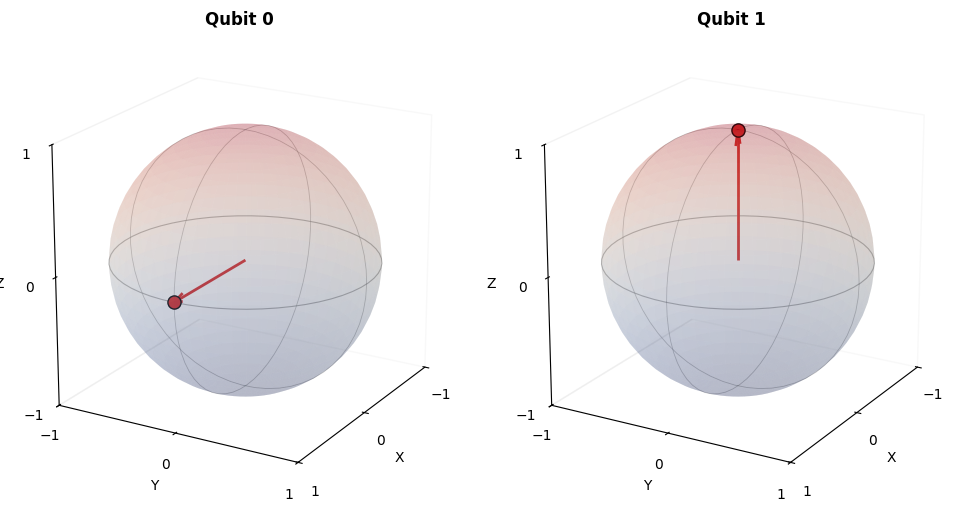

In [7]:
plot_bloch_sphere(state)

In [8]:
save_button = Button(description="Save Figure")

filename_box = Text(
    value = str(title),
    description ="Filename"
)

def save_figure(b):
    global last_fig
    global title
    if last_fig is not None:
        fname = filename_box.value
        if not fname:
            fname = title + '.png'
        folder = "saved.figures"
        os.makedirs(folder, exist_ok=True)
        path = os.path.join(folder,fname)

        last_fig.savefig(path, dpi=300, bbox_inches = "tight")
        print(f"Figure saved as {path}.")
        
save_button.on_click(save_figure)

noise_dropdown = Dropdown(
    options = ["Depolarising", "Dephasing", "Bit flip"],
    description = "Noise type"
)    


In [10]:
state = None
last_fig = None

def initialise_state(n):
    global state
    state = quantumregister(n)
    print(state)


def run_gates(gate_string):
    global state
    commands = gate_string.split(";")
    for cmd in commands:
        if len(cmd) > 1:
            cmd = cmd.strip()
            if not cmd or "(" not in cmd or not cmd.endswith(")"):
                print(f"Invalid format: {cmd}")
                continue
            name, args = cmd[:-1].split("(", 1)
            name = name.strip()
            args = args.strip()
            try:
                qubits = [int(q) for q in args.split(",")] if "," in args else int(args)
            except:
                print(f"Invalid qubit input: {cmd}")
                continue
            state = apply_gate(state, name, qubits)
            print(f"Applied {name} on qubit {qubits}.")

# -----------------------------
# Widgets
# -----------------------------
title = HTML("<h2 style='color:blue;'>Cub<i>e</i><sup>it</sup> Quantum Circuit Simulator</h2>")
init_label = HTML("<b>&larr; Initialise 2 Qubits in |00></b>")
reinit_btn = Button(description="Initialise")
gate_label = HTML("<b>&larr; Enter gates and target qubits, e.g. H(0)</b>")
text_in = Text(description="")
send_btn = Button(description="Apply gates")
noise_dropdown = Dropdown(options=["None", "Depolarizing", "Dephasing", "Amplitude Damping"])
noise_slider = FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description="Level:")
apply_noise_btn = Button(description="Apply noise")
out = Output()
save_label = HTML("<b>&larr; Enter prefix to save all figures</b>")
filename_box = Text(description="Filename:")
save_button = Button(description="Save Figure")

# -----------------------------
# Handlers
# -----------------------------
def on_initialise(_):
    out.clear_output()
    with out:
        initialise_state(2)

def on_send(_):
    out.clear_output()
    with out:
        run_gates(text_in.value)
        plot_bloch_sphere(state)

def on_get_state(_):
    out.clear_output()
    with out:
        plot_bloch_sphere(state)

def on_apply_noise(_):
    out.clear_output()
    with out:
        print(f"Applied {noise_dropdown.value} noise at level {noise_slider.value}")

def save_figure(b):
    global last_fig
    if last_fig is not None:
        fname = filename_box.value or "figure.png"
        folder = "saved.figures"
        os.makedirs(folder, exist_ok=True)
        path = os.path.join(folder, fname)
        last_fig.savefig(path, dpi=300, bbox_inches="tight")
        print(f"Figure saved as {path}.")

reinit_btn.on_click(on_initialise)
send_btn.on_click(on_send)
apply_noise_btn.on_click(on_apply_noise)
save_button.on_click(save_figure)

# -----------------------------
# Assign grid areas
# -----------------------------
title.layout.grid_area = 'title'
init_label.layout.grid_area = 'init_label'
reinit_btn.layout.grid_area = 'init_btn'
gate_label.layout.grid_area = 'gate_label'
text_in.layout.grid_area = 'text_in'
send_btn.layout.grid_area = 'send_btn'
noise_dropdown.layout.grid_area = 'noise_dropdown'
noise_slider.layout.grid_area = 'noise_slider'
apply_noise_btn.layout.grid_area = 'apply_noise_btn'
out.layout.grid_area = 'out'
save_label.layout.grid_area = 'save_label'
filename_box.layout.grid_area = 'filename_box'
save_button.layout.grid_area = 'save_btn'

# -----------------------------
# GridBox layout
# -----------------------------

    
grid = GridBox(
    children=[
        title, init_label, reinit_btn,
        text_in, send_btn, gate_label, 
        noise_dropdown, noise_slider, apply_noise_btn,
        out, filename_box, save_button, save_label
    ],
    layout=Layout(
        width='100%',
        grid_template_columns='1fr 1fr 1fr',
        grid_template_rows='auto auto auto auto 60px 300px auto',
        grid_template_areas='''
". title ."
". init_btn init_label"
"text_in send_btn gate_label"
"noise_dropdown apply_noise_btn noise_slider"
"filename_box save_btn save_label"
". out out"
'''
    )
)

display(grid)


GridBox(children=(HTML(value="<h2 style='color:blue;'>Cub<i>e</i><sup>it</sup> Quantum Circuit Simulator</h2>"…